# Lab 2 - Intro to stan
#### Dominik Czyżyk
gr. 3 - Thursday 9:30

In [5]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
F = len('Dominik')
L = len('Czyzyk')

##### Exercise 1 -  Generated Quantities Block

In [4]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [5]:
df = samples.draws_pd()
df.head()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,0.0,0.0,142.8550,158.0,145.0,130.0,153.0,161.0,130.0,133.0
1,0.0,0.0,164.9160,157.0,163.0,160.0,164.0,177.0,155.0,172.0
2,0.0,0.0,215.8670,217.0,222.0,219.0,214.0,217.0,217.0,210.0
3,0.0,0.0,156.0920,160.0,173.0,177.0,169.0,154.0,181.0,154.0
4,0.0,0.0,21.6008,9.0,24.0,11.0,21.0,23.0,18.0,15.0


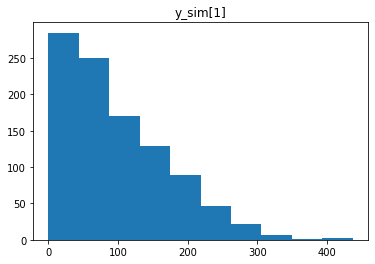

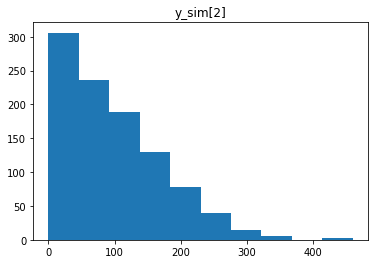

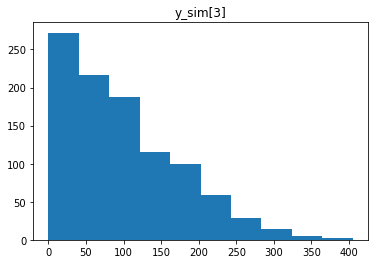

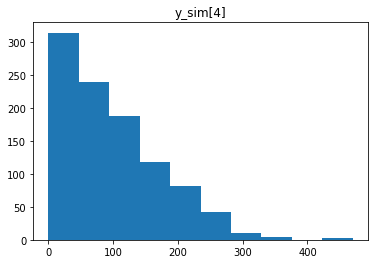

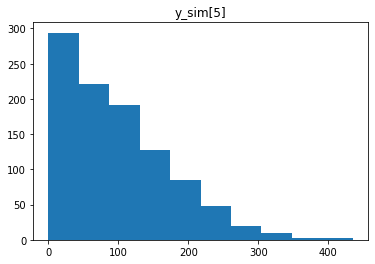

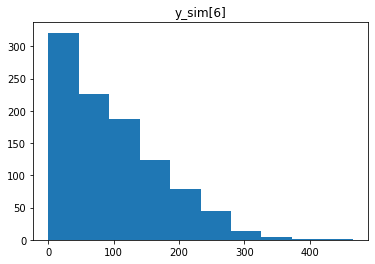

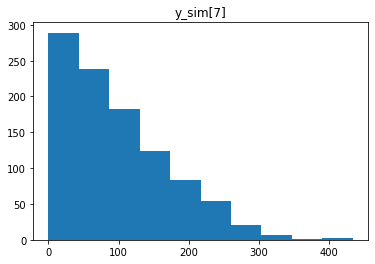

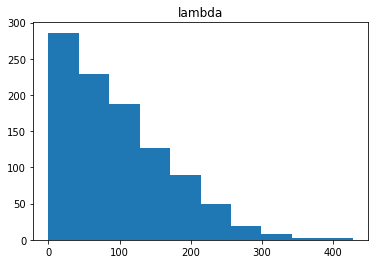

In [7]:
for i in range(3, F+3):
    y_sim = df.iloc[:,i]
    plt.hist(y_sim)
    plt.title("y_sim[" + str(i-2) + "]")
    plt.show()

plt.hist(df["lambda"])
plt.title("lambda")
plt.show()

##### Exercise 2 - constraints on the data

In [8]:
bern1 = CmdStanModel(stan_file='code_2.stan')
bern2 = CmdStanModel(stan_file='code_3.stan')

sample_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
sample_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                     
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


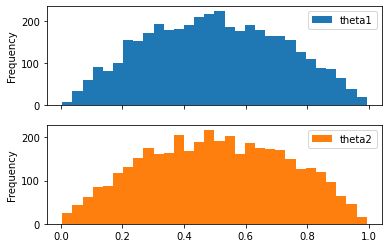

In [11]:
theta1 = sample_bern1.stan_variable('theta')
theta2 = sample_bern2.stan_variable('theta')

df = pd.DataFrame({'theta1': theta1, 'theta2': theta2})
df.plot.hist(subplots=True, bins=30)
plt.show()

##### Exercise 3 - constraints on the parameters

In [12]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file /home/Lab2/code_4.stan to exe file /home/Lab2/code_4
INFO:cmdstanpy:compiled model executable: /home/Lab2/code_4
INFO:cmdstanpy:created output directory: /home/Lab2/samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status



chain 1 |██        | 00:00 Iteration: 1200 / 7000 [ 17%]  (Sampling)

chain 1 |███▏      | 00:00 Iteration: 2000 / 7000 [ 28%]  (Sampling)
chain 1 |████      | 00:00 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▋     | 00:00 Iteration: 3100 / 7000 [ 44%]  (Sampling)


chain 1 |█████▎    | 00:01 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▊    | 00:01 Iteration: 3900 / 7000 [ 55%]  (Sampling)



chain 1 |██████▍   | 00:01 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 4600 / 7000 [ 65%]  (Sampling)


chain 1 |███████▏  | 00:01 Iteration: 4900 / 7000 [ 70%]  (Sampling)



chain 1 |███████▋  | 00:02 Iteration: 520


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab2/samples/code_4-20230319110302_1.csv, /home/Lab2/samples/code_4-20230319110302_2.csv, /home/Lab2/samples/code_4-20230319110302_3.csv, /home/Lab2/samples/code_4-20230319110302_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

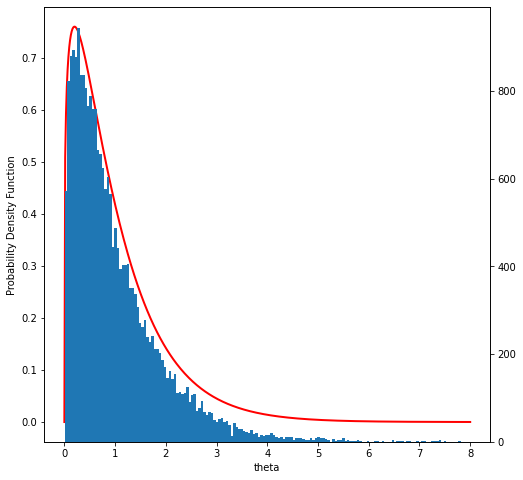

In [35]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(xs, pdfs, linewidth=2, color='r')
ax1.set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")

## add histogram of theta samples with 160 bins
ax2 = ax1.twinx()
df = out_gamma1.draws_pd()
ax2.hist(df["theta"], bins=160)
plt.show()

The diagnostic messages:

```
Rejecting initial value:
  Log probability evaluates to log(0), i.e. negative infinity.
  Stan can't start sampling from this initial value.
```

That happens for negative thetas but stan somehow manages to fix this on its own.

In [14]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/Lab2/code_5.stan to exe file /home/Lab2/code_5
INFO:cmdstanpy:compiled model executable: /home/Lab2/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |██        | 00:00 Iteration: 1200 / 7000 [ 17%]  (Sampling)
chain 1 |███▏      | 00:00 Iteration: 2000 / 7000 [ 28%]  (Sampling)



chain 1 |████      | 00:00 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▋     | 00:01 Iteration: 3100 / 7000 [ 44%]  (Sampling)


chain 1 |█████▎    | 00:01 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |█████▋    | 00:01 Iteration: 3800 / 7000 [ 54%]  (Sampling)


chain 1 |██████    | 00:01 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▌   | 00:01 Iteration: 4400 / 7000 [ 62%]  (Sampling)


chain 1 |██████▉   | 00:02 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |███████▏  | 00:02 Iteration: 4900 / 7000 [ 70%]  (Sampling)


chain 1 |███████▌  | 00:02 Iter


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab2/samples/code_5-20230319110757_1.csv, /home/Lab2/samples/code_5-20230319110757_2.csv, /home/Lab2/samples/code_5-20230319110757_3.csv, /home/Lab2/samples/code_5-20230319110757_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

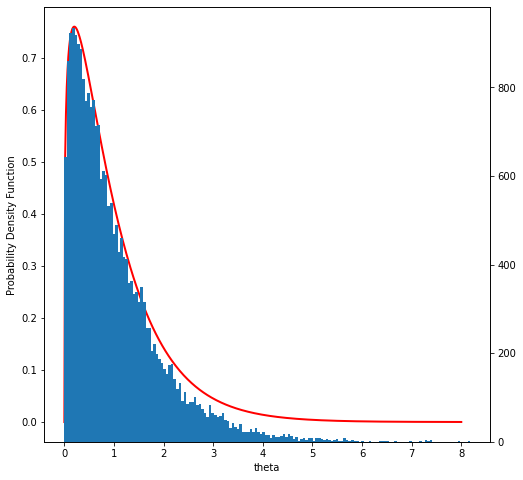

In [36]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(xs, pdfs, linewidth=2, color='r')
ax1.set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")

## add histogram of theta samples with 160 bins
ax2 = ax1.twinx()
df = out_gamma2.draws_pd()
ax2.hist(df["theta"], bins=160)
plt.show()

There are no warning messages like for unconstrained parameter.

##### Excercise 4 - functions and different functionalities of stan

In [7]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:compiling stan file /home/Lab2/code_6.stan to exe file /home/Lab2/code_6
INFO:cmdstanpy:compiled model executable: /home/Lab2/code_6
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Lab2/code_6.hpp /home/Lab2/code_6.stan
Warning in '/home/Lab2/code_6.stan', line 3, column 45: Declaration of arrays
    by placing brackets after a type is deprecated and will be removed in
    Stan 2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc
Warning in '/home/Lab2/code_6.stan', line 3, column 57: Declaration of arrays
    by placing brackets after a type is deprecated and will be removed in
    Stan 2.32.0. Instead use the array keyword before the type. This can be
    changed automatically using the auto-format flag to stanc
Warning in '/home/Lab2/code_6.stan', line 17, column 3: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.52346


##### Excercise 5 - different methods of defining models

In [8]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 14072000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:compiling stan file /home/Lab2/code_7.stan to exe file /home/Lab2/code_7
INFO:cmdstanpy:compiled model executable: /home/Lab2/code_7
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/Lab2/code_7.hpp /home/Lab2/code_7.stan
Warning in '/home/Lab2/code_7.stan', line 6, column 3: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_D


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


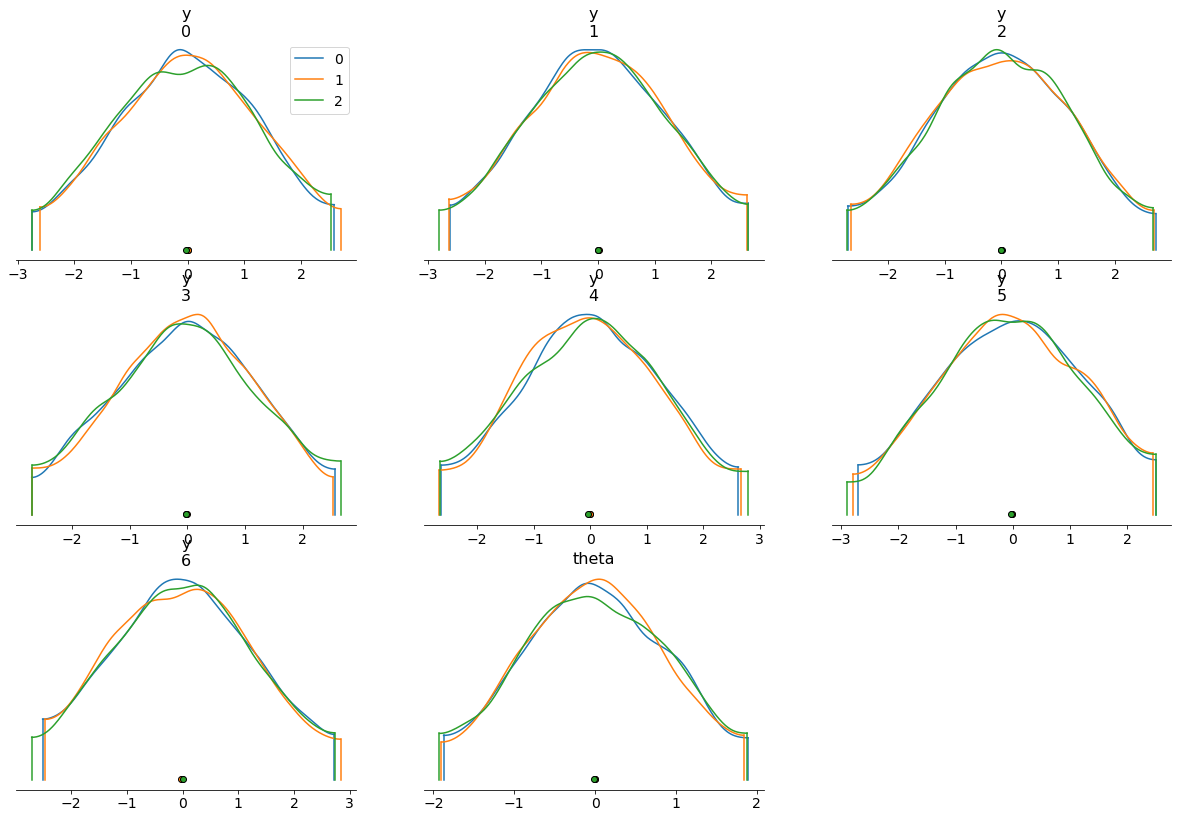

In [9]:
az.plot_density([result_1,result_2,result_3])
plt.show()

##### Excercise 6 - generated quantities post sampling

In [11]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] done processing


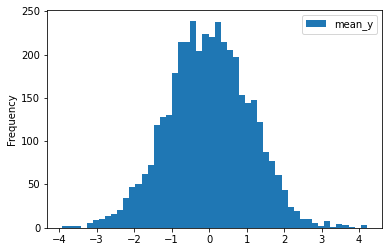

In [13]:
df.plot.hist(bins=50)
plt.show()